In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split

data = pd.read_csv('Pokemon.csv')
train_data , test_data = train_test_split(
    data,
    test_size=0.25,  # 25% for testing
    random_state=42  # Set a seed for reproducibility
)
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


            Total        HP    Attack   Defense   Sp. Atk     Speed   Sp. Def
Total    1.000000  0.618748  0.736211  0.612787  0.747250  0.575943  0.717609
HP       0.618748  1.000000  0.422386  0.239622  0.362380  0.175952  0.378718
Attack   0.736211  0.422386  1.000000  0.438687  0.396362  0.381240  0.263990
Defense  0.612787  0.239622  0.438687  1.000000  0.223549  0.015227  0.510747
Sp. Atk  0.747250  0.362380  0.396362  0.223549  1.000000  0.473018  0.506121
Speed    0.575943  0.175952  0.381240  0.015227  0.473018  1.000000  0.259133
Sp. Def  0.717609  0.378718  0.263990  0.510747  0.506121  0.259133  1.000000


<Axes: >

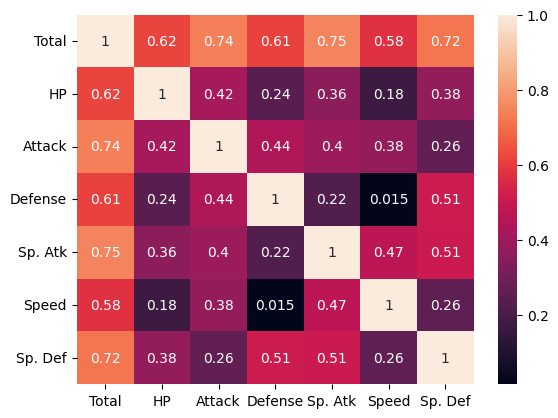

In [4]:
import os
import numpy as np
import seaborn

numericColumns = ['Total','HP','Attack','Defense','Sp. Atk','Speed','Sp. Def']

correlationMatrix  = data.loc[:,numericColumns].corr()

print(correlationMatrix)

seaborn.heatmap(correlationMatrix, annot=True)

spearman's Correlation Coefficient Matrix
            Total        HP    Attack   Defense   Sp. Atk     Speed   Sp. Def
Total    1.000000  0.712736  0.720131  0.681864  0.729735  0.567659  0.756992
HP       0.712736  1.000000  0.565734  0.433402  0.470813  0.265920  0.493280
Attack   0.720131  0.565734  1.000000  0.514995  0.361616  0.373443  0.320620
Defense  0.681864  0.433402  0.514995  1.000000  0.314217  0.092818  0.578816
Sp. Atk  0.729735  0.470813  0.361616  0.314217  1.000000  0.460220  0.571757
Speed    0.567659  0.265920  0.373443  0.092818  0.460220  1.000000  0.320649
Sp. Def  0.756992  0.493280  0.320620  0.578816  0.571757  0.320649  1.000000


<Axes: >

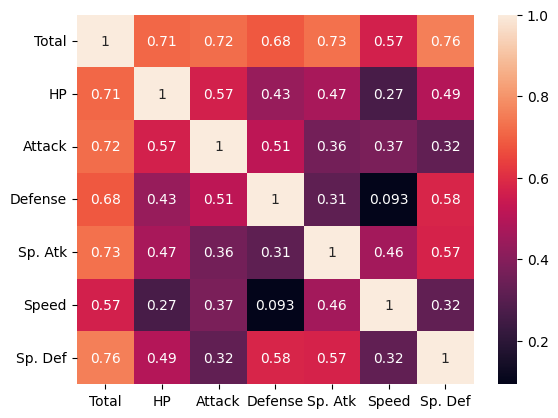

In [9]:

spearmanMatrix = data.loc[:,numericColumns].corr(method='spearman')
print("spearman's Rank Correlation Coefficient Matrix")
print(spearmanMatrix)

seaborn.heatmap(spearmanMatrix, annot=True)

Pearson's Correlation Coefficient Matrix
            Total        HP    Attack   Defense   Sp. Atk     Speed   Sp. Def
Total    1.000000  0.618748  0.736211  0.612787  0.747250  0.575943  0.717609
HP       0.618748  1.000000  0.422386  0.239622  0.362380  0.175952  0.378718
Attack   0.736211  0.422386  1.000000  0.438687  0.396362  0.381240  0.263990
Defense  0.612787  0.239622  0.438687  1.000000  0.223549  0.015227  0.510747
Sp. Atk  0.747250  0.362380  0.396362  0.223549  1.000000  0.473018  0.506121
Speed    0.575943  0.175952  0.381240  0.015227  0.473018  1.000000  0.259133
Sp. Def  0.717609  0.378718  0.263990  0.510747  0.506121  0.259133  1.000000


<Axes: >

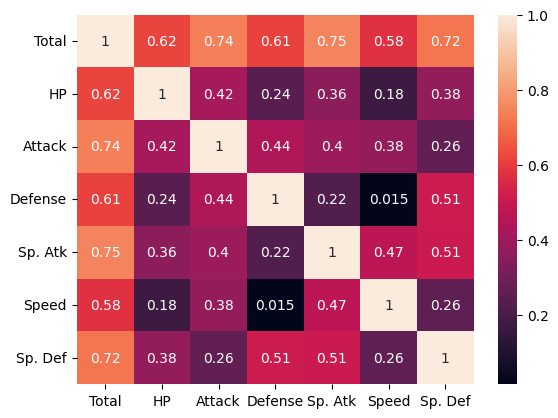

In [5]:
pearsonMatrix = data.loc[:,numericColumns].corr(method='pearson')
print("Pearson's Correlation Coefficient Matrix")
print(pearsonMatrix)

seaborn.heatmap(pearsonMatrix, annot=True)


Kendall's Rank Correlation Coefficient Matrix
            Total        HP    Attack   Defense   Sp. Atk     Speed   Sp. Def
Total    1.000000  0.538119  0.539829  0.506165  0.553971  0.402575  0.572964
HP       0.538119  1.000000  0.413993  0.324233  0.338039  0.180047  0.357735
Attack   0.539829  0.413993  1.000000  0.369529  0.258397  0.259124  0.223371
Defense  0.506165  0.324233  0.369529  1.000000  0.220791  0.063026  0.451869
Sp. Atk  0.553971  0.338039  0.258397  0.220791  1.000000  0.329196  0.422981
Speed    0.402575  0.180047  0.259124  0.063026  0.329196  1.000000  0.222677
Sp. Def  0.572964  0.357735  0.223371  0.451869  0.422981  0.222677  1.000000


<Axes: >

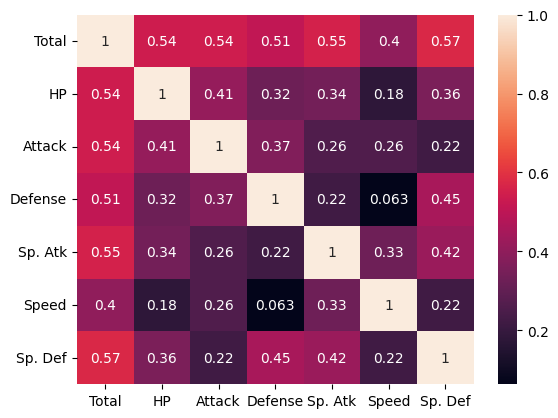

In [8]:
KendallMatrix = data.loc[:,numericColumns].corr(method='kendall')
print("Kendall's Rank Correlation Coefficient Matrix")
print(KendallMatrix)

seaborn.heatmap(KendallMatrix, annot=True)

In [10]:
from scipy.stats import chi2_contingency
# Discretize the 'Total' column into three categories: low, medium, and high
train_data['Total_Category'] = pd.cut(train_data['Total'], bins=3, labels=['Low', 'Medium', 'High'])
# Assuming 'Type 1' is a categorical column, you can replace it with the desired categorical column
categorical_column = 'Type 1'
# Create a contingency table between 'Total_Category' and the categorical column
contingency_table = pd.crosstab(train_data['Total_Category'], train_data[categorical_column])
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square test statistic: 108.86895772119973
p-value: 9.110681136819371e-10
Degrees of freedom: 34
Expected frequencies table:
[[20.25333333  6.87166667  9.40333333 11.57333333  5.06333333  8.68
  15.19        1.085       7.95666667 17.72166667  8.31833333  7.23333333
  28.57166667  7.23333333 13.02       11.935       7.95666667 28.93333333]
 [29.30666667  9.94333333 13.60666667 16.74666667  7.32666667 12.56
  21.98        1.57       11.51333333 25.64333333 12.03666667 10.46666667
  41.34333333 10.46666667 18.84       17.27       11.51333333 41.86666667]
 [ 6.44        2.185       2.99        3.68        1.61        2.76
   4.83        0.345       2.53        5.635       2.645       2.3
   9.085       2.3         4.14        3.795       2.53        9.2       ]]


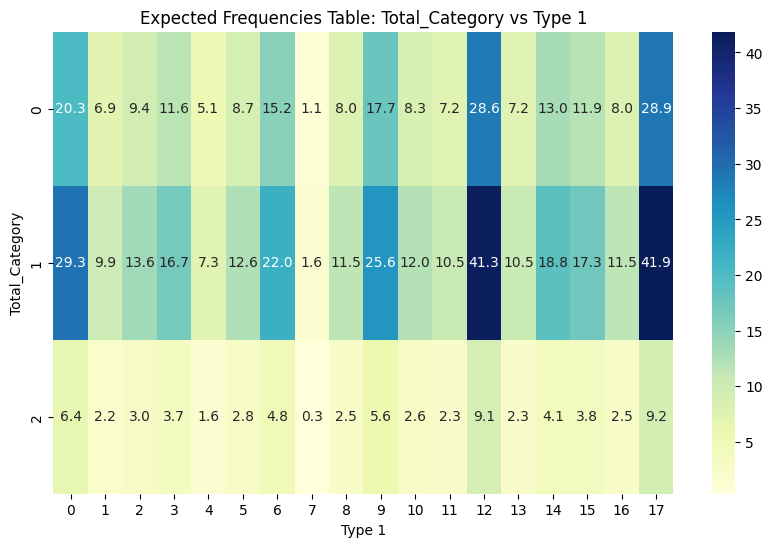

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
categorical_column = 'Type 1'
contingency_table = pd.crosstab(train_data['Total_Category'], train_data[categorical_column])
chi2, p, dof, expected = chi2_contingency(contingency_table)
plt.figure(figsize=(10, 6))
sns.heatmap(expected, annot=True, cmap="YlGnBu", fmt='.1f')
plt.title('Expected Frequencies Table: Total_Category vs ' + categorical_column)
plt.xlabel(categorical_column)
plt.ylabel('Total_Category')
plt.show()

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Type 1' is a categorical column, you can replace it with the desired categorical column
categorical_column = 'Type 1'

# Create a count plot
sns.countplot(data=expected, x=categorical_column)
plt.title('Frequency Table for ' + categorical_column)
plt.xlabel(categorical_column)
plt.ylabel('Frequency')
plt.show()


TypeError: Data source must be a DataFrame or Mapping, not <class 'numpy.ndarray'>.